In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [61]:
df = pd.read_excel('Broadway_Grosses.xlsx')

In [62]:
df['show'] = df['show'].str.capitalize()

In [63]:
df = df[~df.type.str.contains("Special")]

In [64]:
df = df.set_index('date')

In [65]:
df.head()

,show,type,theatre,previews,performances,grosses,prev_week_gross,GG%GP,attend,prev_week_attend,%cap,close_month,genre,tony_noms,tony_awards
date,,,,,,,,,,,,,,,
2017-05-21,NaN,Play,Hudson,4,0,212626,$,0.48,3378,NaN,0.87,0,Mystery,1,0
2017-05-28,NaN,Play,Hudson,7,0,298438,212626,0.45,5079,3378.0,0.75,0,Mystery,1,0
2017-06-04,NaN,Play,Hudson,8,0,282053,298438,0.36,5230,5079.0,0.67,0,Mystery,1,0
2017-06-11,NaN,Play,Hudson,8,0,288446,282053,0.37,5554,5230.0,0.72,0,Mystery,1,0
2017-06-18,NaN,Play,Hudson,8,0,301461,288446,0.39,6018,5554.0,0.78,0,Mystery,1,0


In [66]:
df = df.dropna()

In [67]:
df.isnull().sum()

show                0
type                0
theatre             0
previews            0
performances        0
grosses             0
prev_week_gross     0
GG%GP               0
attend              0
prev_week_attend    0
%cap                0
close_month         0
genre               0
tony_noms           0
tony_awards         0
dtype: int64

In [68]:
df.shape

(7840, 15)

In [69]:
df = pd.get_dummies(df, columns = ['show', 'type', 'theatre', 'genre'], drop_first = True)

In [70]:
X = df.drop('close_month', axis = 1)
y = df['close_month']

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [72]:
classifier = Sequential()

In [73]:
classifier.add(Dense(32, activation = 'relu', input_dim = 261))
classifier.add(Dropout(0.5))

classifier.add(Dense(64, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(2, activation = 'softmax'))

In [74]:
classifier.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [75]:
X_array = np.asarray(X_train).astype('float32')
y_array = np.asarray(y_train).astype('float32')
X_testarray = np.asarray(X_test).astype('float32')
y_testarray = np.asarray(y_test).astype('float32')

In [76]:
history = classifier.fit(X_array, y_array, batch_size = 10, epochs = 50, verbose = 1)

Epoch 1/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6336 - accuracy: 0.6658
Epoch 2/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6360 - accuracy: 0.7823
Epoch 3/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6341 - accuracy: 0.5485
Epoch 4/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6360 - accuracy: 0.1293
Epoch 5/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6348 - accuracy: 0.1293
Epoch 6/50
588/588 [==============================] - 1s 920us/step - loss: 7.6360 - accuracy: 0.1293
Epoch 7/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6360 - accuracy: 0.1293
Epoch 8/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6360 - accuracy: 0.1293
Epoch 9/50
588/588 [==============================] - 1s 1ms/step - loss: 7.6348 - accuracy: 0.1293
Epoch 10/50
588/588 [==============================] - 1s 979us/step - loss: 7.6348 - accuracy: 0.

In [77]:
predictions = classifier.predict(x=X_testarray, verbose=0)

In [78]:
cm = confusion_matrix(y_true=y_testarray, y_pred=np.argmax(predictions, axis=-1))

In [79]:
import itertools

In [80]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.grid(False)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [81]:
cm_labels = ['Close', 'Do Not Close']

Confusion matrix, without normalization
[[   0 1691]
 [   0  269]]


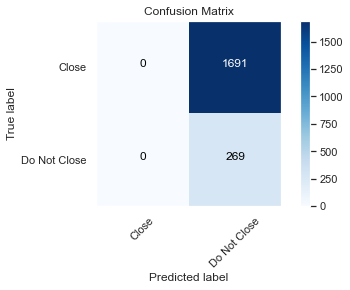

In [82]:
plot_confusion_matrix(cm=cm, classes=cm_labels, title='Confusion Matrix')

In [ ]:
predictions = list(mdoel.predict())

In [86]:
print(classification_report(y_test, history))

TypeError: Expected sequence or array-like, got <class 'tensorflow.python.keras.callbacks.History'>